In [1]:
%pip install "pycaret[full]"

  Using cached pycaret-3.3.0-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.4.1.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pyod-1.1.3-py3-none-any.whl
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached lightgbm-4.3.0-py3-none-manylinux_2_28_x86_64

In [4]:
import pandas as pd
data = pd.read_csv("pm25_air4thai_44t_2024-01-01_2024-02-26.csv")
del data['Unnamed: 0']
data


,DATETIMEDATA,PM25
0,2024-01-01 00:00:00,16.5
1,2024-01-01 01:00:00,33.6
2,2024-01-01 02:00:00,34.2
3,2024-01-01 03:00:00,20.1
4,2024-01-01 04:00:00,16.5
...,...,...
494,2024-01-21 14:00:00,24.3
495,2024-01-21 15:00:00,23.1
496,2024-01-21 16:00:00,27.8
497,2024-01-21 17:00:00,22.9


<Axes: >

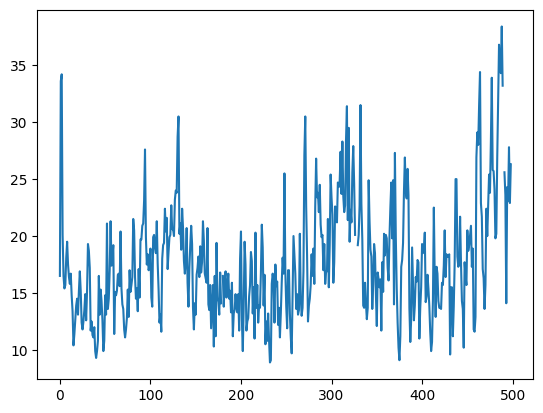

In [5]:
data['PM25'].plot()

In [6]:
data.dtypes

DATETIMEDATA     object
PM25            float64
dtype: object

In [7]:
data['DATETIMEDATA'] = pd.to_datetime(data['DATETIMEDATA'])

In [8]:
data.dtypes

DATETIMEDATA    datetime64[ns]
PM25                   float64
dtype: object

In [9]:
data.set_index('DATETIMEDATA',
               drop=True,
               inplace=True)

In [10]:
data.head()

,PM25
DATETIMEDATA,
2024-01-01 00:00:00,16.5
2024-01-01 01:00:00,33.6
2024-01-01 02:00:00,34.2
2024-01-01 03:00:00,20.1
2024-01-01 04:00:00,16.5


<Axes: xlabel='DATETIMEDATA'>

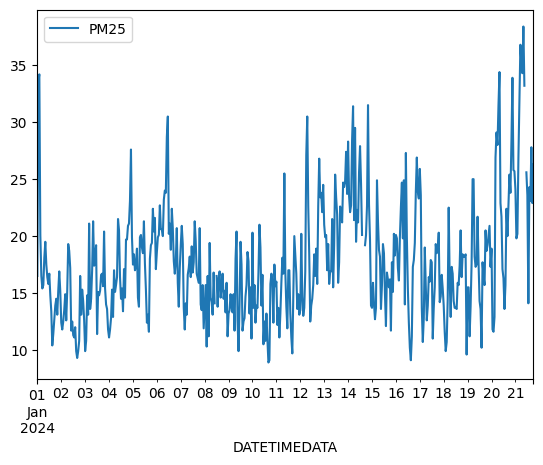

In [11]:
data.plot()

In [12]:
data.info()
mean_pm = data['PM25'].mean()
data['PM25'].fillna(mean_pm, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 499 entries, 2024-01-01 00:00:00 to 2024-01-21 18:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    495 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 499 entries, 2024-01-01 00:00:00 to 2024-01-21 18:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    499 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [13]:
from pycaret.time_series import *
s = setup(data,
          fold=3,
          fh=50,
          session_id=123)

,Description,Value
0,session_id,123
1,Target,PM25
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(499, 1)"
5,Transformed data shape,"(499, 1)"
6,Transformed train set shape,"(449, 1)"
7,Transformed test set shape,"(50, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
from pycaret.time_series import TSForecastingExperiment
s1 =TSForecastingExperiment()

In [14]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,499.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,17.726061
3,Summary,Statistics,Transformed,Median,,16.8
4,Summary,Statistics,Transformed,Standard Deviation,,5.07855
5,Summary,Statistics,Transformed,Variance,,25.791674
6,Summary,Statistics,Transformed,Kurtosis,,1.448689
7,Summary,Statistics,Transformed,Skewness,,1.05676
8,Summary,Statistics,Transformed,# Distinct Values,,179.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1258.577512


In [15]:
plot_model()

In [16]:
plot_model(plot = 'train_test_split')

In [17]:
best = compare_models(sort = 'MAE')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.9034,0.8530,3.4553,4.3341,0.1953,0.1924,-0.0560,0.3533
croston,Croston,0.9511,0.8824,3.6264,4.4737,0.2101,0.1995,-0.1124,0.0100
naive,Naive Forecaster,0.9974,0.9254,3.8190,4.7070,0.2151,0.2132,-0.2749,0.5600
auto_arima,Auto ARIMA,1.0113,0.9332,3.8341,4.7088,0.2077,0.2110,-0.2474,24.4500
theta,Theta Forecaster,1.0170,0.9439,3.8588,4.7686,0.2067,0.2131,-0.2772,0.0200
ets,ETS,1.0293,0.9724,3.9087,4.9141,0.2044,0.2171,-0.3767,0.0600
exp_smooth,Exponential Smoothing,1.0296,0.9727,3.9096,4.9154,0.2044,0.2172,-0.3774,0.0467
grand_means,Grand Means Forecaster,1.0687,0.9879,4.0489,4.9844,0.2216,0.2231,-0.4011,0.4400
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.0695,0.9596,4.0654,4.8480,0.2281,0.2237,-0.3197,0.3600
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.0771,0.9666,4.1038,4.8917,0.2354,0.2251,-0.3462,0.4367


In [18]:
best

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [24, 23,
                                                                        22, 21,
                                                                        20, 19,
                                                                        18, 17,
                                                                        16, 15,
                                                                        14, 13,
                                                                        12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=KNeighborsRegressor(n_jobs=-1), sp=24,
                    window_length=24)

In [19]:
best.get_params()

{'degree': 1,
 'deseasonal_model': 'additive',
 'fe_target_rr': [WindowSummarizer(lag_feature={'lag': [24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
                                        14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3,
                                        2, 1]},
                   n_jobs=1)],
 'regressor': KNeighborsRegressor(n_jobs=-1),
 'sp': 24,
 'window_length': 24,
 'regressor__algorithm': 'auto',
 'regressor__leaf_size': 30,
 'regressor__metric': 'minkowski',
 'regressor__metric_params': None,
 'regressor__n_jobs': -1,
 'regressor__n_neighbors': 5,
 'regressor__p': 2,
 'regressor__weights': 'uniform'}

In [20]:
predict_model(best, fh = 24)

,y_pred
2024-01-19 17:00,14.3042
2024-01-19 18:00,16.1458
2024-01-19 19:00,16.1277
2024-01-19 20:00,17.7305
2024-01-19 21:00,15.8819
2024-01-19 22:00,18.8969
2024-01-19 23:00,16.3774
2024-01-20 00:00,17.0275
2024-01-20 01:00,16.5562
2024-01-20 02:00,14.4966


In [21]:
final_best = finalize_model(best)

In [22]:
predict_model(final_best, fh = 24)

,y_pred
2024-01-21 19:00,25.1408
2024-01-21 20:00,24.9192
2024-01-21 21:00,23.2278
2024-01-21 22:00,25.3498
2024-01-21 23:00,22.2676
2024-01-22 00:00,22.1233
2024-01-22 01:00,21.6134
2024-01-22 02:00,17.5008
2024-01-22 03:00,18.2592
2024-01-22 04:00,18.2333


In [23]:
plot_model(best, plot = 'forecast')